# Battery Modelling Exercise p2D - Introduction
Welcome to the exercise regarding p2D. In this exercise you get an overview of a physical-chemical battery model and a short introduction in modelling and simulating with "PyBaMM" (Python Battery Mathematical Modelling), which is an open-source tool for modelling differential equations with a focus on battery modelling (Sulzer et al., Journal of Open Research, DOI: 10.5334/jors.309).

If you want to have a deeper insight in PyBaMM you can have a look at the official page of PyBaMM which includes many examples for battery modelling for different purposes, a documentary and a discussion page on GitHub https://pybamm.org/.


The exercise is divided in two parts:

(a)   Introduction in PyBaMM and creating a first battery model.

(b)   Comparison of different physical-chemical models: SPM (Single Particle Model), SPMe (Single Particle Model with Electrolyte), and DFN (Doyle-Fuller-Newmann model).




 


________________________________________________________________________________________________________________________________
The process of battery model simulation with PyBaMM can be separated into the following steps:
1.  Define the model and the geometry using PyBaMM's syntax
2.  Parametrize the model expressions with numerical values
3.  Mesh and discretize the model
4.  Solve the model with solving algorithms
5.  Post-processing the results

PyBaMM uses symbolic expressions for encoding the mathematical equations into a symbolic expression tree. Therefore, dictionaries represent the equations, boundary equations and initial conditions.

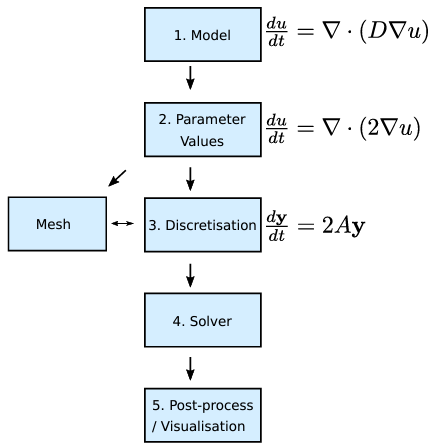

Sulzer et al., Journal of Open Research, DOI: 10.5334/jors.309

# (a) Intruduction in PyBaMM and creating a first battery model
In this part of the exercise we will create a first simple battery model to give a short introduction in modelling and simulating within PyBaMM's environment.

PyBaMM is an open-source toolbox, so it is free of charge and the source code is open to edit for user defined extensions or changes. The source code of PyBaMM is published via GitHub under https://github.com/pybamm-team/PyBaMM.

First, we need to download and install PyBaMM's packages. If you run PyBaMM on a local machine (e.g. on your laptop or personal computer) you need to do this only once. If you work in a virtual machine like in Google Colab you have to do this every time you start a new session.

In [10]:
%pip install pybamm[plot,cite] -q    # install PyBaMM if it is not installed

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Then, we need to import the libraries in our actual Python session. We also import the Numpy package (https://numpy.org/) for defining Matlab-like numerical arrays and the Matplotlib (https://matplotlib.org/) for creating plots of the results.

In [11]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

First, we define our model. PyBaMM provides some predefined models (https://docs.pybamm.org/en/latest/source/api/models/index.html). In this exercise we start with the standard Doyle-Fuller-Newman model [Newman et al. 1978]. At this point we could also use other models like SPM.

For the DFN model we have further options to include submodels like modelling the thermal behaviour, particle swelling or SEI growth which are implemented as dictionary entries. The dictionary entries should be listed in the variable "model_options" (in this example) which refers to the battery model class. A list and a short explanation of the submodels can be found here https://docs.pybamm.org/en/latest/source/api/models/index.html.

In [3]:
#Define our DFN model
model_options={}    #syntax should be like  model_options={"calculate discharge energy":"true"}
model=pybamm.lithium_ion.DFN(model_options) #Define our DFN model

Next, we parametrize our model. In this example we use the parameter set from Chen et al. 2020 (J. Electrochem. Soc. 167 080534) which is based on a LG M50 Li-Ion cell (cathode material: NMC811, anode material: graphite-silicon composite). The parameter set is included in PyBaMM's library and can be found on the GitHub page or in the local installation files (https://github.com/pybamm-team/PyBaMM/blob/develop/pybamm/input/parameters/lithium_ion/Chen2020.py).

In the parameter repository on GitHub you can find other parameter sets: https://github.com/pybamm-team/PyBaMM/tree/develop/pybamm/input/parameters/lithium_ion.

We want to apply a current of 5A which is equivalent to a C-Rate of 1C (nominal cell capacity of the LG M50 cell is 5 Ah). Therefore, we update (pybamm.Parameter.update is a PyBaMM specific funtion) the parameter "Current function [A]" which is defined as a dictionary entry (for more information about this datatype see https://docs.python.org/3/tutorial/datastructures.html#dictionaries).

In [4]:
param=pybamm.ParameterValues("Chen2020") #choose the parameter set Chen 2020
param.update({"Current function [A]":5}) #update applied current

In the following, we discretize the model. That is, we define the meshing approach for the finite volumina method and the number of finite volumina elements.
Then, we create a PyBaMM simulation case which is used for solving and processing the variables.

In [5]:
submesh_types=model.default_submesh_types # Definition of the meshing method for the whole as default
submesh_types["negative particle"]=pybamm.MeshGenerator(pybamm.Uniform1DSubMesh) # Definition of the meshing method for the negative particle
submesh_types["positive particle"]=pybamm.MeshGenerator(pybamm.Uniform1DSubMesh) # Definition of the meshing method for the positive particle
var_pts={"x_n":20,"x_s":15,"x_p":20,"r_n":20,"r_p":20,} # Definition of the volumina elements for the different domains, 
#"x_n" = negative electrode, #"x_s"= separator,"x_p"= positive electrode,"r_n"= negative particle,"r_p"= positive electrode


sim = pybamm.Simulation(model, parameter_values=param, var_pts=var_pts, submesh_types=submesh_types) #setup the simulation case


Now we did all the necessary steps to setup our simulation case. In the following step we will solve the simulation case and get our first results.

In [6]:
sim.solve([0,3600])  #solving for 1h=3600s

The solving process has been finished. Now we can conduct the post-processing step and plot the results.

In [7]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3555.445377650817, step=35.55445377650817), …

We can also use Matplotlib to create custom plots of our results. Therefore, we store the PyBaMM result variables (here time and voltage) which can be accessed via dictionary entries, and the subscript ".entries" into a list variable and plot them.

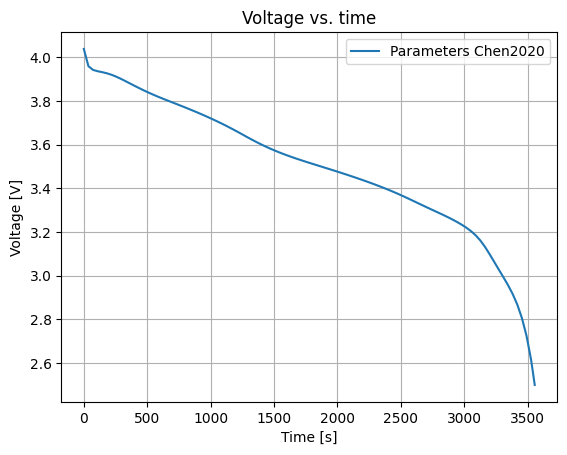

In [8]:
#we define a new figure with matplotlib
fig, ax = plt.subplots()
#we store the results "Time [s]" and "Voltage [V]" in a list variable
time = sim.solution["Time [s]"].entries
voltage = sim.solution["Voltage [V]"].entries
#here we plot the voltage variable as a function of time and give a label name
ax.plot(time, voltage,label=f"Parameters Chen2020")
ax.set_title("Voltage vs. time")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")
ax.grid(True)
ax.legend(loc='best')
plt.show()

# Task
In the following code snippets, the previous model setup and simulation is condensed in one command.


Create simulation cases for C-rates of 0.1, 0.5, 1, 2 and plot the voltage outputs in a single plot as a function of the discharge capacity. To get an idea of how to code this, see Tutorial 3 and Tutorial 9 from PyBaMM.
  
Tutorial 3: https://docs.pybamm.org/en/latest/source/examples/notebooks/getting_started/tutorial-3-basic-plotting.html

Tutorial 9: https://docs.pybamm.org/en/latest/source/examples/notebooks/getting_started/tutorial-9-changing-the-mesh.html

You can see how the solution could look like in the attending pdf for this workshop.

In [9]:
#Template
import pybamm
import numpy as np
import matplotlib.pyplot as plt

model_options={}
model=pybamm.lithium_ion.DFN(model_options)
param=pybamm.ParameterValues("Chen2020")

submesh_types=model.default_submesh_types
submesh_types["negative particle"]=pybamm.MeshGenerator(pybamm.Uniform1DSubMesh)
submesh_types["positive particle"]=pybamm.MeshGenerator(pybamm.Uniform1DSubMesh)
var_pts={"x_n":20,"x_s":20,"x_p":20,"r_n":20,"r_p":20,}
solutions=[]
c_rate_val=[******]
fig, ax = plt.subplots()
for value in c_rate_val:
  # here you should initialize and solve the model and store the variable into the "capacity" and "voltage" variable
  *****
  ax.plot(capacity, voltage,label=f"{value} C / {value*5} A")
ax.set_title("Voltage vs. discharge capacity")
ax.set_xlabel("Discharge capacity [Ah]")
ax.set_ylabel("Voltage [V]")
ax.grid(True)
ax.legend(loc='best')
plt.show()
######

SyntaxError: invalid syntax (3566536125.py, line 15)